<a href="https://colab.research.google.com/github/ankity7/Computational-Physics/blob/main/Copy_of_PHY425_lec3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Multistep Methods

##Adams-Bashforth formula of order 5 (AB5)
###predictor
$x_{n+1} = x_{n}+ af_{n}+bf_{n-1}+cf_{n-2} \dots$

In [ ]:
#here x_0 and t_0 are initial 5 values array
def AB5(x_0,t_0,upper,h,f):
  a=(h/720)*1901
  b=(h/720)*(-2774)
  c=(h/720)*2616
  d=(h/720)*(-1274)
  e=(h/720)*251
  if t_0[-1] <= upper:
    x_predict=x_0[-1] +a*f(t_0[-1],x_0[-1]) + b*f(t_0[-2],x_0[-2]) +c*f(t_0[-3],x_0[-3]) + \
    d*f(t_0[-4],x_0[-4]) + e*f(t_0[-5],x_0[-5])
  else :
    x_predict=x_0[-1]
  return x_predict

In [ ]:
t_i= np.linspace(0.9,1,5)
t_0=[]
for i in t_i:
  t_0.append(i)
x_0=[]
for i in t_0:
  x_0.append(real_sol(i))
t_0
x_0

[2.280562477168786,
 2.191743385712362,
 2.117195905738303,
 2.054005851493437,
 2.0]

In [ ]:
t=t_0
x=x_0

In [ ]:
AB5(x_0,t_0,upper,h,f)

1.8139718031261278

##Adams-Moulton formula of order 5 (AM5)
### Corrector
$x_{n+1} = x_{n}+ af_{n+1}+bf_{n}+cf_{n-1}+df_{n-2} \dots$


In [ ]:
#here x_0 and t_0 are initial 4 values and one value from predictor (AB) array 
def AM5(x_0,t_0,upper,h,f,predict):
  a=(h/720)*251
  b=(h/720)*(646)
  c=(h/720)*(-264)
  d=(h/720)*(106)
  e=(h/720)*(-19)
  t_0.append(t_0[-1]+h)
  if t_0[-1] <= upper:
    x_correct=x_0[-1] +a*f(t_0[-1]+h,predict) + b*f(t_0[-2],x_0[-1]) +c*f(t_0[-3],x_0[-2]) + \
    d*f(t_0[-4],x_0[-3]) + e*f(t_0[-5],x_0[-4])
    x_0.append(x_correct)
  else:
    t_0.pop()
  return t_0,x_0

In [ ]:
predict=AB5(x,t,upper,h,f)
(v1,v2)=AM5(x,t,upper,h,f,predict)
len(v1)-len(v2)


NameError: ignored

##Adam-Bashforth-Moulton formula for order 5 (ABM5)

In [ ]:
def ABM5(x_0,t_0,lower,upper,h,f):
  M=int((upper-lower)/h)
  for i in range(M):
    predict=AB5(x_0,t_0,upper,h,f)
    (t_0,x_0)=AM5(x_0,t_0,upper,h,f,predict)
  return t_0,x_0


In [ ]:
def f(t,x):
  fun=(t*x-x**2)*(t**(-2))
  return fun
def real_sol(t):
  f=t*(np.log(t)+1/2)**(-1)
  return f

5
24


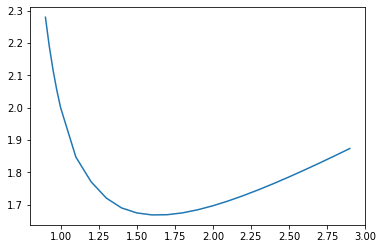

In [ ]:
t_i= np.linspace(0.9,1,5)
t_0=[]
for i in t_i:
  t_0.append(i)
x_0=[]
for i in t_0:
  x_0.append(real_sol(i))
print(len(t_0))
lower=1
upper=3
h=0.1
(t,x)=ABM5(x_0,t_0,lower,upper,h,f)
print(len(t_0))
plt.plot(t,x)

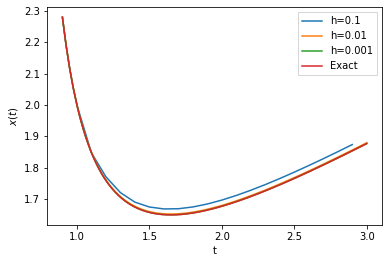

In [ ]:
lower=1
upper=3
h=0.1
H=[(0.1),(0.01),(0.001)] #  h
ax = plt.subplot()
T=[]
X=[]
for h in H:
  #initial values of order 5
  t_i= np.linspace(lower-0.1,lower,5) # 5 initial values
  t_0=[]
  for i in t_i:
    t_0.append(i)
  x_0=[]
  for i in t_0:
    x_0.append(real_sol(i))
  (t,x)=ABM5(x_0,t_0,lower,upper,h,f)
  plt.plot(t,x,label=f"h={h}")
  T.append(t)
  X.append(x)

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

In [ ]:
def neat(n,L):
  n1=int(len(L)/n)
  L1=[]
  for index,val in enumerate(L):
    if (index % n1)==0:
      L1.append(val)
  return L1

In [ ]:
L=np.linspace(0,100,300)
print(neat(15,L))

[0.0, 6.688963210702341, 13.377926421404682, 20.066889632107024, 26.755852842809364, 33.44481605351171, 40.13377926421405, 46.82274247491639, 53.51170568561873, 60.20066889632107, 66.88963210702342, 73.57859531772576, 80.2675585284281, 86.95652173913044, 93.64548494983278]


In [ ]:
for i in range(0,8,3):
  print(i)


0
3
6


In [ ]:
print('HI ankiy')

HI ankiy


In [ ]:
neat(15,T[0])

[0.9,
 0.925,
 0.95,
 0.975,
 1.0,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000004,
 1.5000000000000004,
 1.6000000000000005,
 1.7000000000000006,
 1.8000000000000007,
 1.9000000000000008,
 2.000000000000001,
 2.100000000000001,
 2.200000000000001,
 2.300000000000001,
 2.4000000000000012,
 2.5000000000000013,
 2.6000000000000014,
 2.7000000000000015,
 2.8000000000000016,
 2.9000000000000017]

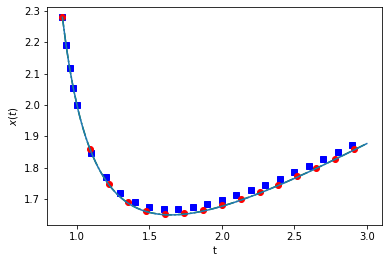

In [ ]:

plt.plot(neat(15,T[0]), neat(15,X[0]), 'bs', neat(15,T[1]), neat(15,X[1]), 'ro', T[2], X[2], 'g-.')
plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
#leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
plt.show()


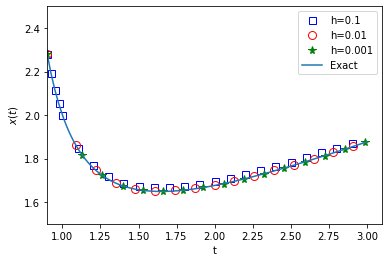

In [ ]:
plt.plot(neat(15,T[0]), neat(15,X[0]), 'bs', markerfacecolor='none',markersize=7,label=f"h={H[0]}")
plt.plot( neat(15,T[1]), neat(15,X[1]), 'ro',markerfacecolor='none', 
         markersize=8,  label=f"h={H[1]}")
plt.plot( neat(15,T[2]), neat(15,X[2]), 'g*',markersize=8,label=f"h={H[2]}")
plt.plot(t,(real_sol(t)),label="Exact")
plt.axis([lower-0.1, upper+0.1, 1.5,2.5 ])
plt.legend()
plt.xlabel("t")
plt.ylabel(r"$x(t)$")

plt.show()

In [ ]:
plt.text?

#AB4 Predictor, AM4 corrector with ABM4

In [ ]:
#predictor
def AB4(x_0,t_0,upper,h,f):
  a=(h/24)*55
  b=(h/24)*(-59)
  c=(h/24)*37
  d=(h/24)*(-9)
  
  if t_0[-1] <= upper:
    x_predict=x_0[-1] +a*f(t_0[-1],x_0[-1]) + b*f(t_0[-2],x_0[-2]) +c*f(t_0[-3],x_0[-3]) + \
    d*f(t_0[-4],x_0[-4]) 
  else :
    x_predict=x_0[-1]
  return x_predict

#Corrector
def AM4(x_0,t_0,upper,h,f,predict):
  a=(h/24)*9
  b=(h/24)*(19)
  c=(h/24)*(-5)
  d=(h/24)*(1)
  t_0.append(t_0[-1]+h)
  if t_0[-1] <= upper:
    x_correct=x_0[-1] +a*f(t_0[-1]+h,predict) + b*f(t_0[-2],x_0[-1]) +c*f(t_0[-3],x_0[-2]) + \
    d*f(t_0[-4],x_0[-3]) 

    x_0.append(x_correct)
  else:
    t_0.pop()
  return t_0,x_0
#final 
def ABM4(x_0,t_0,lower,upper,h,f):
  M=int((upper-lower)/h)
  for i in range(M):
    predict=AB4(x_0,t_0,upper,h,f)
    (t_0,x_0)=AM4(x_0,t_0,upper,h,f,predict)
  return t_0,x_0


In [ ]:
def f(t,x):
  fun=(t*x-x**2)*(t**(-2))
  return fun
def real_sol(t):
  f=t*(np.log(t)+1/2)**(-1)
  return f

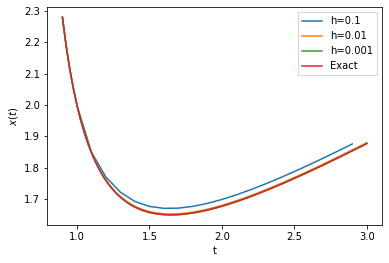

In [ ]:
lower=1
upper=3
h=0.1
H=[(0.1),(0.01),(0.001)] #  h
ax = plt.subplot()
T=[]
X=[]
for h in H:
  #initial values of order 5
  t_i= np.linspace(lower-0.1,lower,5) # 5 initial values
  t_0=[]
  for i in t_i:
    t_0.append(i)
  x_0=[]
  for i in t_0:
    x_0.append(real_sol(i))
  (t,x)=ABM4(x_0,t_0,lower,upper,h,f)
  plt.plot(t,x,label=f"h={h}")
  T.append(t)
  X.append(x)

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

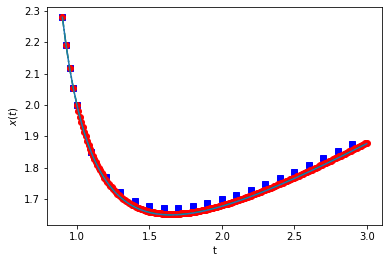

In [ ]:
plt.plot(T[0], X[0], 'bs', T[1], X[1], 'ro', T[2], X[2], 'g-.')
plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
#leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
plt.show()

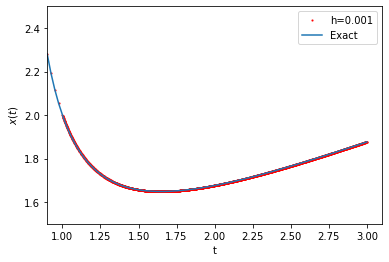

In [ ]:
'''plt.plot(T[0], X[0], 'bs', markerfacecolor='none',markersize=9,label=f"h={H[0]}")
plt.plot( T[1], X[1], 'o',markerfacecolor='black', 
         markersize=8,  label=f"h={H[1]}")'''
plt.plot( T[2], X[2], 'rs',markerfacecolor='none',markersize=1,label=f"h={H[2]}")
plt.plot(t,(real_sol(t)),label="Exact")
plt.axis([lower-0.1, upper+0.1, 1.5,2.5 ])
plt.legend()
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
plt.show()

##AB2 Predictor, AM2 corrector with ABM2

In [ ]:
#predictor
def AB2(x_0,t_0,upper,h,f):
  a=(h/2)*3
  b=(h/2)*(-1)
  if t_0[-1] <= upper:
    x_predict=x_0[-1] +a*f(t_0[-1],x_0[-1]) + b*f(t_0[-2],x_0[-2])
  else :
    x_predict=x_0[-1]
  return x_predict

#Corrector
def AM2(x_0,t_0,upper,h,f,predict):
  a=(h/2)*1
  b=(h/2)*1
  t_0.append(t_0[-1]+h)
  if t_0[-1] <= upper:
    x_correct=x_0[-1] +a*f(t_0[-1]+h,predict) + b*f(t_0[-2],x_0[-1])

    x_0.append(x_correct)
  else:
    t_0.pop()
  return t_0,x_0
#final 
def ABM2(x_0,t_0,lower,upper,h,f):
  M=int((upper-lower)/h)
  for i in range(M):
    predict=AB2(x_0,t_0,upper,h,f)
    (t_0,x_0)=AM2(x_0,t_0,upper,h,f,predict)
  return t_0,x_0


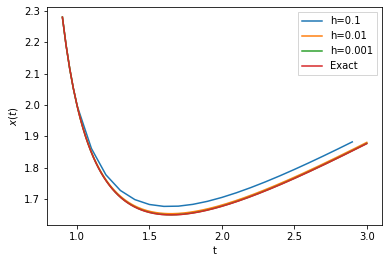

In [ ]:
def f(t,x):
  fun=(t*x-x**2)*(t**(-2))
  return fun
def real_sol(t):
  f=t*(np.log(t)+1/2)**(-1)
  return f

lower=1
upper=3
h=0.1
H=[(0.1),(0.01),(0.001)] #  h
ax = plt.subplot()
T=[]
X=[]
for h in H:
  #initial values of order 5
  t_i= np.linspace(lower-0.1,lower,5) # 5 initial values
  t_0=[]
  for i in t_i:
    t_0.append(i)
  x_0=[]
  for i in t_0:
    x_0.append(real_sol(i))
  (t,x)=ABM2(x_0,t_0,lower,upper,h,f)
  plt.plot(t,x,label=f"h={h}")
  T.append(t)
  X.append(x)

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()


#Milne-Simpson Method
##Predictor

$p_{n+1} = x_{n-3}+ af_{n}+bf_{n-1}+cf_{n-2}$

##Corrector
$x_{n+1} = x_{n-1}+ af_{n+1}+bf_{n}+cf_{n-1}$

In [ ]:
#predictor
def predictor(x_0,t_0,upper,h,f):
  a=(4*h/3)*2
  b=(4*h/3)*(-1)
  c=(4*h/3)*(2)
  if t_0[-1] <= upper:
    x_predict=x_0[-4] +a*f(t_0[-1],x_0[-1]) + b*f(t_0[-2],x_0[-2])+c*f(t_0[-3],x_0[-3])
  else :
    x_predict=x_0[-1]
  return x_predict

#Corrector
def corrector(x_0,t_0,upper,h,f,predict):
  a=(h/3)*1
  b=(h/3)*4
  c=(h/3)*1
  t_0.append(t_0[-1]+h)
  if t_0[-1] <= upper:
    x_correct=x_0[-2] +a*f(t_0[-1]+h,predict) + b*f(t_0[-2],x_0[-1]) +c*f(t_0[-3],x_0[-2])

    x_0.append(x_correct)
  else:
    t_0.pop()
  return t_0,x_0
#final 
def Milne_Simpson(x_0,t_0,lower,upper,h,f):
  M=int((upper-lower)/h)
  for i in range(M):
    predict=predictor(x_0,t_0,upper,h,f)
    (t_0,x_0)=corrector(x_0,t_0,upper,h,f,predict)
  return t_0,x_0


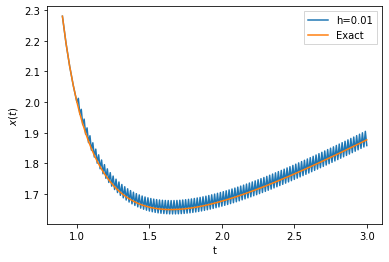

In [ ]:
def f(t,x):
  fun=(t*x-x**2)*(t**(-2))
  return fun
def real_sol(t):
  f=t*(np.log(t)+1/2)**(-1)
  return f

lower=1
upper=3
h=0.1
H=[(0.01)] #  h
ax = plt.subplot()
T=[]
X=[]
for h in H:
  #initial values of order 5
  t_i= np.linspace(lower-0.1,lower,5) # 5 initial values
  t_0=[]
  for i in t_i:
    t_0.append(i)
  x_0=[]
  for i in t_0:
    x_0.append(real_sol(i))
  (t,x)=Milne_Simpson(x_0,t_0,lower,upper,h,f)
  plt.plot(t,x,label=f"h={h}")
  T.append(t)
  X.append(x)

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

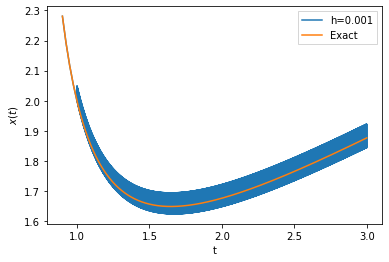

In [ ]:
lower=1
upper=3
h=0.1
H=[(0.001)] #  h
ax = plt.subplot()
T=[]
X=[]
for h in H:
  #initial values of order 5
  t_i= np.linspace(lower-0.1,lower,5) # 5 initial values
  t_0=[]
  for i in t_i:
    t_0.append(i)
  x_0=[]
  for i in t_0:
    x_0.append(real_sol(i))
  (t,x)=Milne_Simpson(x_0,t_0,lower,upper,h,f)
  plt.plot(t,x,label=f"h={h}")
  T.append(t)
  X.append(x)

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

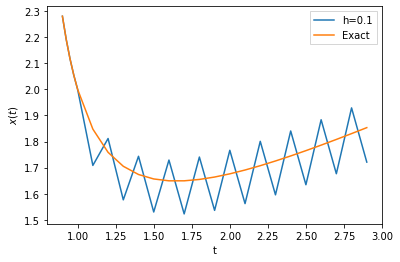

In [ ]:
lower=1
upper=3
h=0.1
H=[(0.1)] #  h
ax = plt.subplot()
T=[]
X=[]
for h in H:
  #initial values of order 5
  t_i= np.linspace(lower-0.1,lower,5) # 5 initial values
  t_0=[]
  for i in t_i:
    t_0.append(i)
  x_0=[]
  for i in t_0:
    x_0.append(real_sol(i))
  (t,x)=Milne_Simpson(x_0,t_0,lower,upper,h,f)
  plt.plot(t,x,label=f"h={h}")
  T.append(t)
  X.append(x)

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

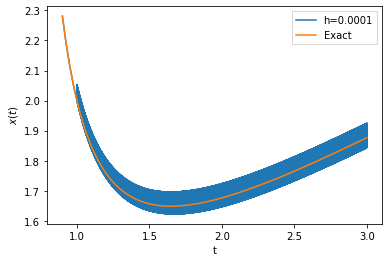

In [ ]:
lower=1
upper=3
h=0.1
H=[(0.0001)] #  h
ax = plt.subplot()
T=[]
X=[]
for h in H:
  #initial values of order 5
  t_i= np.linspace(lower-0.1,lower,5) # 5 initial values
  t_0=[]
  for i in t_i:
    t_0.append(i)
  x_0=[]
  for i in t_0:
    x_0.append(real_sol(i))
  (t,x)=Milne_Simpson(x_0,t_0,lower,upper,h,f)
  plt.plot(t,x,label=f"h={h}")
  T.append(t)
  X.append(x)

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

#Systems and Higher Order ODEs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f1(t,x,y):
    f=x+2*y
    return f
def f2(t,x,y):
    f=3*x+2*y
    return f
def exact_x(t):
  x=4*np.exp(4*t)+2*np.exp(-t)
  return x
def exact_y(t):
  y=6*np.exp(4*t)-2*np.exp(-t)
  return y

In [ ]:

def rk_4(x_0,a,b,h,f1,f2):
  M=int((b-a)/h)
  t=np.linspace(a,b,M+1)
  x=x_0
  for j in range(M):
    f11=h*f1(t[j],x[0][j],x[1][j])
    f12=h*f2(t[j],x[0][j],x[1][j])
    f21=h*f1(t[j]+h/2,x[0][j]+f11/2,x[1][j]+f11/2)
    f22=h*f2(t[j]+h/2,x[0][j]+f12/2,x[1][j]+f12/2)
    f31=h*f1(t[j]+h/2,x[0][j]+f21/2,x[1][j]+f21/2)
    f32=h*f2(t[j]+h/2,x[0][j]+f22/2,x[1][j]+f22/2)
    f41=h*f1(t[j]+h,x[0][j]+f31,x[1][j]+f31)
    f42=h*f2(t[j]+h,x[0][j]+f32,x[1][j]+f32)
    x[0].append(x[0][j]+(f11+2*f21+2*f31+f41)/6)
    x[1].append(x[1][j]+(f12+2*f22+2*f32+f42)/6)
  
  return t,x[0],x[1]

In [ ]:
x_0=[[6],
     [4]]
a=0
b=0.2
h=0.01
for i in rk_4(x_0,a,b,h,f1,f2):
  print(len(i))

21
21
21


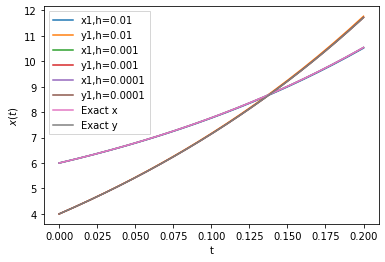

In [ ]:
x_0=[[6],
     [4]]
a=0
b=0.2

H=[0.01,0.001,0.0001] #  h
ax = plt.subplot()
T=[]
X=[]
Y=[]
for h in H:
  x_0=[[6],
      [4]]
  a=0
  b=0.2
  (t,x,y)=rk_4(x_0,a,b,h,f1,f2)
  plt.plot(t,x,label=f"x1,h={h}")
  plt.plot(t,y,label=f"y1,h={h}")
  T.append(t)
  X.append(x)
  Y.append(y)
plt.plot(t,(exact_x(t)),label="Exact x")
plt.plot(t,(exact_y(t)),label="Exact y")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

[[6], [4]]

In [ ]:
def neat(n,L):
  n1=int(len(L)/n)
  L1=[]
  for index,val in enumerate(L):
    if (index % n1)==0:
      L1.append(val)
  return L1

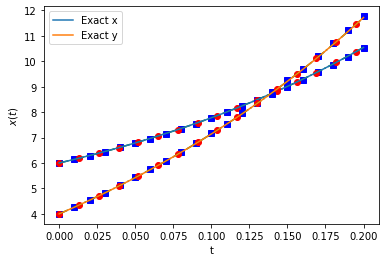

In [ ]:
plt.plot(neat(15,T[0]), neat(15,X[0]), 'bs', neat(15,T[1]), neat(15,X[1]), 'ro', T[2], X[2], 'g-.')
plt.plot(t,(exact_x(t)),label="Exact x")
plt.xlabel("t")
plt.plot(neat(15,T[0]), neat(15,Y[0]), 'bs', neat(15,T[1]), neat(15,Y[1]), 'ro', T[2], Y[2], 'g-.')
plt.plot(t,(exact_y(t)),label="Exact y")
plt.xlabel("t")
plt.legend()
plt.ylabel(r"$x(t)$")
#leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
plt.show()

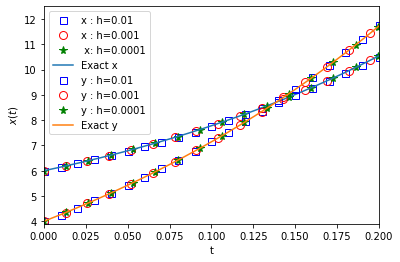

In [ ]:
plt.plot(neat(15,T[0]), neat(15,X[0]), 'bs', markerfacecolor='none',markersize=7,label=f"x : h={H[0]}")
plt.plot( neat(15,T[1]), neat(15,X[1]), 'ro',markerfacecolor='none', 
         markersize=8,  label=f"x : h={H[1]}")
plt.plot( neat(15,T[2]), neat(15,X[2]), 'g*',markersize=8,label=f" x: h={H[2]}")
plt.plot(t,(exact_x(t)),label="Exact x")

plt.plot(neat(15,T[0]), neat(15,Y[0]), 'bs', markerfacecolor='none',markersize=7,label=f"y : h={H[0]}")
plt.plot( neat(15,T[1]), neat(15,Y[1]), 'ro',markerfacecolor='none', 
         markersize=8,  label=f"y : h={H[1]}")
plt.plot( neat(15,T[2]), neat(15,Y[2]), 'g*',markersize=8,label=f"y : h={H[2]}")
plt.plot(t,(exact_y(t)),label="Exact y")

plt.axis([0, 0.2, 3.9,12.5 ])

plt.legend()
plt.xlabel("t")
plt.ylabel(r"$x(t)$")

plt.show()

[1, 2, 3, 1]